<a href="https://colab.research.google.com/github/Mehpara/Datasets/blob/main/DS3_BR%2C_CC%2C_LP%2C_GB_%2C_LR%2C_SVC%2C_SDG_classifiers_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn
!pip install numpy
!pip install Pandas
!pip install scikit-multilearn
!pip install simplekml
!pip install matplotlib-venn
!pip install --upgrade scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 89 kB 2.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 1.2 MB/s 
  Created wheel for simplekml: filename=simplekml-1.3.6-py3-none-any.whl size=65876 sha256=e908274e8661f057b619e73188ec2895861418f7b5941d7f580538ae99ae8a0a
  Stored in directory: /root/.cache/pip/wheels/5c/ec/e6/10af1a1fb29ffca95151d4c886d6e06fc309c68f46519892de
Successfully built simplekml
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Lo

In [3]:
# Load EDA Pkgs
import pandas as pd
import numpy as np
# Load Data Viz Pkgs
import matplotlib.pyplot as plt
import seaborn as sns
#/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
import pandas.util.testing as tm
# ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
### Split Dataset into Train and Text
from sklearn.model_selection import train_test_split

# Feature engineering
from sklearn.feature_extraction.text import TfidfVectorizer
# Multi Label Pkgs


from skmultilearn.adapt import MLkNN

#Main Libray Import File for BinaryRelevance, Label Powerset ,ClassifierChain 
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.problem_transform import ClassifierChain

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/Mehpara/Datasets/main/movies_reviews.csv')
df

,id,comment_text,Action,Adult,Adventure,Animation,Biography,Comedy
0,"""#7DaysLater"" (2013)",dayslater interactive comedy series feature en...,0,0,0,0,0,1
1,"""#BlackLove"" (2015) {Crash the Party (#1.9)}",week leave workshops women consider idea ladie...,0,0,0,0,0,0
2,"""#BlackLove"" (2015) {Making Lemonade Out of Le...",women start make stride towards find version h...,0,0,0,0,0,0
3,"""#BlackLove"" (2015) {Miss Independent (#1.5)}",women independent strong theyve face strife re...,0,0,0,0,0,0
4,"""#BlackLove"" (2015) {Sealing the Deal (#1.10)}",despite go life change process past weeks wome...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
995,"""60 Minutes"" (1968) {Ambush in Afghanistan/The...",ambush afghanistan examine sophisticate tactic...,0,0,0,0,0,0
996,"""60 Minutes"" (1968) {America's Missile Fields/...",americas missile field rebroadcast special beh...,0,0,0,0,0,0
997,"""60 Minutes"" (1968) {America's New Air Force/T...",americas new air force look rise u militarys u...,0,0,0,0,0,0
998,"""60 Minutes"" (1968) {An American Town/The Comm...",special hour edition look back attack american...,0,0,0,0,0,0


In [5]:
df.loc[0].comment_text

'dayslater interactive comedy series feature ensemble cast youtube celebrities week audience write brief via social media new episode feature well know guest star days later weeks episode premier tv multiple platforms'

In [6]:
# Check type

df.dtypes

id              object
comment_text    object
Action           int64
Adult            int64
Adventure        int64
Animation        int64
Biography        int64
Comedy           int64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


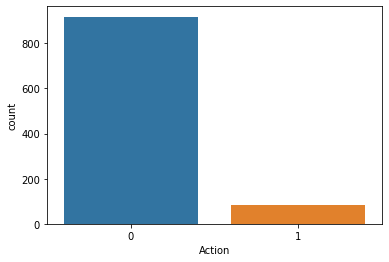

In [7]:
# Value Count 
sns.countplot(df['Action'])

In [8]:
df['Comedy'].value_counts()

0    680
1    320
Name: Comedy, dtype: int64

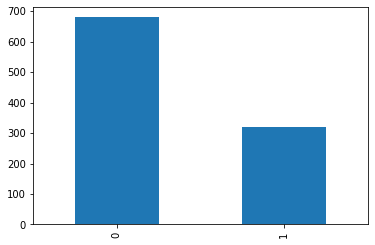

In [10]:
df['Comedy'].value_counts().plot(kind='bar')

In [9]:
#Text Preprocessing    neattext : remove_stopwords  
!pip install neattext
import neattext as nt
import neattext.functions as nfx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 4.1 MB/s 


In [11]:
# Explore For Noise
df['comment_text'].apply(lambda x:nt.TextFrame(x).noise_scan())

0      {'text_noise': 0.9259259259259258, 'text_lengt...
1      {'text_noise': 1.1299435028248588, 'text_lengt...
2      {'text_noise': 1.8315018315018317, 'text_lengt...
3      {'text_noise': 0.2976190476190476, 'text_lengt...
4      {'text_noise': 3.0534351145038165, 'text_lengt...
                             ...                        
995    {'text_noise': 0, 'text_length': 252, 'noise_c...
996    {'text_noise': 0.5263157894736842, 'text_lengt...
997    {'text_noise': 0, 'text_length': 193, 'noise_c...
998    {'text_noise': 0.7920792079207921, 'text_lengt...
999    {'text_noise': 0.4524886877828055, 'text_lengt...
Name: comment_text, Length: 1000, dtype: object

In [12]:
# Explore For Noise
df['comment_text'].apply(lambda x:nt.TextExtractor(x).extract_stopwords())

0                                [via, well]
1                             [towards, put]
2      [make, towards, become, even, though]
3                                     [make]
4                       [go, still, get, go]
                       ...                  
995                                       []
996                                 [behind]
997                                       []
998                     [back, go, see, see]
999                                   [make]
Name: comment_text, Length: 1000, dtype: object

In [13]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [14]:
# Explore For Noise
df['comment_text'].apply(nfx.remove_stopwords)

0      dayslater interactive comedy series feature en...
1      week leave workshops women consider idea ladie...
2      women start stride find version happy end tenn...
3      women independent strong theyve face strife re...
4      despite life change process past weeks women i...
                             ...                        
995    ambush afghanistan examine sophisticate tactic...
996    americas missile field rebroadcast special sce...
997    americas new air force look rise u militarys u...
998    special hour edition look attack american town...
999    safer announce recent death longtime contribut...
Name: comment_text, Length: 1000, dtype: object

In [15]:
corpus = df['comment_text'].apply(nfx.remove_stopwords)

In [16]:
tfidf = TfidfVectorizer()
tfidf

TfidfVectorizer()

In [17]:
# Build Features
Xfeatures = tfidf.fit_transform(corpus).toarray()
Xfeatures

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
df.head()

,id,comment_text,Action,Adult,Adventure,Animation,Biography,Comedy
0,"""#7DaysLater"" (2013)",dayslater interactive comedy series feature en...,0,0,0,0,0,1
1,"""#BlackLove"" (2015) {Crash the Party (#1.9)}",week leave workshops women consider idea ladie...,0,0,0,0,0,0
2,"""#BlackLove"" (2015) {Making Lemonade Out of Le...",women start make stride towards find version h...,0,0,0,0,0,0
3,"""#BlackLove"" (2015) {Miss Independent (#1.5)}",women independent strong theyve face strife re...,0,0,0,0,0,0
4,"""#BlackLove"" (2015) {Sealing the Deal (#1.10)}",despite go life change process past weeks wome...,0,0,0,0,0,0


In [19]:
y = df[['Action', 'Adult', 'Adventure','Animation', 'Animation', 'Comedy']]

In [20]:
# Split Data 
X_train,X_test,y_train,y_test = train_test_split(Xfeatures,y,test_size=0.3,random_state=42)

In [21]:
print(df['comment_text'].shape)
print(X_train.shape)

(1000,)
(700, 9110)


In [22]:
# Building Our Model
# Estimator + Multilabel Estimator
### Problem Transform
import skmultilearn

In [23]:
dir(skmultilearn)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'adapt',
 'base',
 'problem_transform',
 'utils']

In [40]:
#BinaryRelevance(classifier=MultinomialNB(alpha=1.0, class_prior=None,fit_prior=True),require_dense=[True, True])

In [52]:
#multilabel.classes_

In [53]:
#pd.DataFrame(y, columns=multilabel.classes_)

In [54]:
#TFID vectorizer
tfidf=TfidfVectorizer(analyzer='word', max_features=10000, ngram_range=(1,2),stop_words='english')
X=tfidf.fit_transform(df['comment_text'])
X

<1000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 39477 stored elements in Compressed Sparse Row format>

In [ ]:
tfidf.vocabulary_


In [56]:
#Tokenization
X.shape,y.shape

((1000, 10000), (1000, 6))

In [57]:
X

<1000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 39477 stored elements in Compressed Sparse Row format>

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=0)

In [ ]:
y

In [ ]:
# Convert Our Multi-Label Prob to Multi-Class

binary_rel_clf = BinaryRelevance(MultinomialNB())
binary_rel_clf.fit(X_train,y_train)

In [ ]:
# Predictions
br_prediction = binary_rel_clf.predict(X_test)
br_prediction

In [ ]:
# Convert to Array  To See Result
br_prediction.toarray()

In [69]:
# Accuracy
accuracy_score(y_test,br_prediction)

0.72

In [70]:

# Hamming Loss :Incorrect Predictions
# The Lower the result the better
hamming_loss(y_test,br_prediction)

0.056666666666666664

In [71]:
#f1 score:
print("f1 score:")
print("micro")
print(f1_score(y_test,br_prediction, average='micro'))
print("macro")
print(f1_score(y_test,br_prediction, average='macro'))

f1 score:
micro
0.5321100917431192
macro
0.11507936507936506


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [72]:
#precision :
print("precision:")
print("micro")
print(precision_score(y_test,br_prediction, average='micro'))
print("macro")
print(precision_score(y_test,br_prediction, average='macro'))

precision:
micro
1.0
macro
0.16666666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
#Recall:
print("recall:")
print("micro")
print(recall_score(y_test,br_prediction, average='micro'))
print("macro")
print(recall_score(y_test,br_prediction, average='macro'))

recall:
micro
0.3625
macro
0.08787878787878788


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
#Classifier chain Model building to get results of F1score ,Precison ,Recall
classifier_chain_clf = ClassifierChain(MultinomialNB())
classifier_chain_clf.fit(X_train,y_train)

ClassifierChain(classifier=MultinomialNB(), require_dense=[True, True])

In [79]:
# Predictions
br_prediction = classifier_chain_clf.predict(X_test)
br_prediction

<150x6 sparse matrix of type '<class 'numpy.float64'>'
	with 29 stored elements in Compressed Sparse Column format>

In [ ]:
# Convert to Array  To See Result
br_prediction.toarray()

In [83]:
#accuracy ,Hamming Loss
print("accuracy:")
print(accuracy_score(y_test,br_prediction))
print("hamming_loss")
print(hamming_loss(y_test,br_prediction))


accuracy:
0.72
hamming_loss
0.056666666666666664


In [82]:
#f1 score:
print("f1 score:")
print("micro")
print(f1_score(y_test,br_prediction, average='micro'))
print("macro")
print(f1_score(y_test,br_prediction, average='macro'))


f1 score:
micro
0.5321100917431192
macro
0.11507936507936506


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [84]:
#precision :
print("precision:")
print("micro")
print(precision_score(y_test,br_prediction, average='micro'))
print("macro")
print(precision_score(y_test,br_prediction, average='macro'))

precision:
micro
1.0
macro
0.16666666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
#Recall:
print("recall:")
print("micro")
print(recall_score(y_test,br_prediction, average='micro'))
print("macro")
print(recall_score(y_test,br_prediction, average='macro'))

recall:
micro
0.3625
macro
0.08787878787878788


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
#Label Powerset Model building to get results of F1score ,Precison ,Recall
label_powerset_clf = LabelPowerset(MultinomialNB())
label_powerset_clf.fit(X_train,y_train)

LabelPowerset(classifier=MultinomialNB(), require_dense=[True, True])

In [94]:
# Predictions
br_prediction = label_powerset_clf.predict(X_test)
br_prediction

<150x6 sparse matrix of type '<class 'numpy.int64'>'
	with 35 stored elements in List of Lists format>

In [ ]:
# Convert to Array  To See Result
br_prediction.toarray()

In [96]:
#accuracy ,Hamming Loss
print("accuracy:")
print(accuracy_score(y_test,br_prediction))
print("hamming_loss")
print(hamming_loss(y_test,br_prediction))


accuracy:
0.74
hamming_loss
0.056666666666666664


In [97]:
#f1 score:
print("f1 score:")
print("micro")
print(f1_score(y_test,br_prediction, average='micro'))
print("macro")
print(f1_score(y_test,br_prediction, average='macro'))

f1 score:
micro
0.5565217391304348
macro
0.11851851851851852


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [98]:
#precision :
print("precision:")
print("micro")
print(precision_score(y_test,br_prediction, average='micro'))
print("macro")
print(precision_score(y_test,br_prediction, average='macro'))


precision:
micro
0.9142857142857143
macro
0.15238095238095237


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [99]:
#Recall:
print("recall:")
print("micro")
print(recall_score(y_test,br_prediction, average='micro'))
print("macro")
print(recall_score(y_test,br_prediction, average='macro'))

recall:
micro
0.4
macro
0.09696969696969697


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
